In [1]:
import pandas as pd

data = pd.read_csv('features_data_frequency.csv')

In [2]:
data

,amplitude,max_slope,freq1_freq,tic_id,activity_flag
0,0.000000,0.000000,0.000000,NaN,NaN
1,0.006705,5.389917,0.152955,439946126.0,0.0
2,0.005196,4.664454,0.094523,439949948.0,0.0
3,0.004217,3.966777,0.026039,407574350.0,0.0
4,0.123440,85.156697,0.210020,150899677.0,0.0
...,...,...,...,...,...
278,0.006088,6.335461,0.074437,434100291.0,0.0
279,0.745767,2127.016127,0.121482,49737073.0,0.0
280,0.049983,60.534987,1.892369,238176832.0,1.0
281,0.090538,125.015072,0.287529,441051650.0,1.0


In [3]:
data = data.drop(0)

In [4]:
amplitude = data['amplitude']
max_slope = data['max_slope']
frequency = data['freq1_freq']
tic_id = data['tic_id']
activity_flag = data['activity_flag']

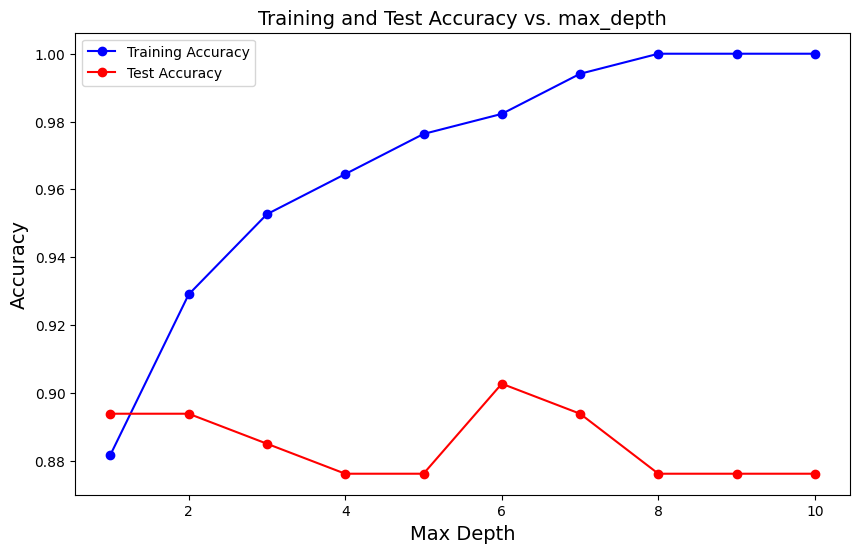

The optimal max_depth is: 6
0.9026548672566371
0.9822485207100592


In [18]:
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X = data[['amplitude', 'max_slope', 'freq1_freq']]
y = data['activity_flag']

# Create empty lists to store training and test accuracies
train_accuracy = []
test_accuracy = []

# Splitting data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Vary max_depth from 1 to 30
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)

    #training accuracy
    train_acc = model.score(X_train, y_train)
    train_accuracy.append(train_acc)

    #test accuracy
    test_acc = model.score(X_test, y_test)
    test_accuracy.append(test_acc)

# Plot Training and Test Accuracy vs Max_depth
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracy, label='Training Accuracy', marker='o', c='b')
plt.plot(range(1, 11), test_accuracy, label='Test Accuracy', marker='o', c='r')
plt.title('Training and Test Accuracy vs. max_depth', fontsize = 14)
plt.xlabel('Max Depth', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend()
plt.show()

# Finds best max depth and prints
best_max_depth = np.argmax(test_accuracy) + 1  # +1 because indexing

print("The optimal max_depth is:", best_max_depth)
print(test_accuracy[5])
print(train_accuracy[5])

DT_model = model

In [6]:
feature_importances = model.feature_importances_
print(feature_importances)
print(data.columns)
# Amplitude has the highest feature importance

[0.5928145  0.15021922 0.25696628]
Index(['amplitude', 'max_slope', 'freq1_freq', 'tic_id', 'activity_flag'], dtype='object')


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = data[['amplitude', 'max_slope', 'freq1_freq']]
labels = data['activity_flag']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size=0.3, random_state=0)

# Create a Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train the model on the training data
dtree.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = dtree.predict(X_valid)

# Evaluate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {accuracy}')

# Find the misclassified instances
misclassified_indices = y_valid[y_valid != y_pred].index

# Get the TIC IDs of misclassified instances as integers
misclassified_tic_ids = data.loc[misclassified_indices, 'tic_id'].astype(int)
misclassified_activity_flag = data.loc[misclassified_indices, 'activity_flag']

print("Misclassified TIC IDs:")
print(misclassified_tic_ids)

print('Misclassified Activity flags:')
print(misclassified_activity_flag)

Validation Accuracy: 0.9176470588235294
Misclassified TIC IDs:
91     376664521
16     245763892
161    233040803
160    202467073
275    444153368
179    344771708
268     29257288
Name: tic_id, dtype: int64
Misclassified Activity flags:
91     0.0
16     0.0
161    0.0
160    0.0
275    1.0
179    0.0
268    1.0
Name: activity_flag, dtype: float64


In [8]:
# Model with only amplitude feature
features = data[['amplitude']]
labels = data[['activity_flag']]

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size=0.3, random_state=0)

# Create a Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train the model on the training data
dtree.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = dtree.predict(X_valid)

# Evaluate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy (only amplitude): {accuracy}')

Validation Accuracy (only amplitude): 0.8823529411764706


In [9]:
# Model with only max_slope feature
features = data[['max_slope']]
labels = data[['activity_flag']]

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size=0.3, random_state=0)

# Create a Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train the model on the training data
dtree.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = dtree.predict(X_valid)

# Evaluate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy (only max_slope): {accuracy}')

Validation Accuracy (only max_slope): 0.8235294117647058


In [10]:
# Model with only frequency feature
features = data[['freq1_freq']]
labels = data[['activity_flag']]

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size=0.3, random_state=0)

# Create a Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train the model on the training data
dtree.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = dtree.predict(X_valid)

# Evaluate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy (only frequency): {accuracy}')

Validation Accuracy (only frequency): 0.8470588235294118


In [ ]:
# @title hidden cells for neural network model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

# Generate some example data

X = data[['amplitude', 'max_slope', 'freq1_freq']]
y = data['activity_flag']

# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store training history
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=8, verbose=2)

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# @title hidden plots for neural network model
plt.figure(figsize = (12, 5))

# Training and Validation Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['loss'], label = 'Training Loss', color = 'crimson')
plt.plot(history.epoch, history.history['val_loss'], label = 'Validation Loss', color = 'dodgerblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Training and Validation Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.epoch, history.history['accuracy'], label = 'Training Accuracy', color = 'crimson')
plt.plot(history.epoch, history.history['val_accuracy'], label = 'Validation Accuracy', color = 'dodgerblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [13]:
# Imports Ment dataset
data_new = pd.read_csv('ment_tess_features.csv')

In [14]:
data_new

,amplitude,max_slope,freq1_freq,tic_id,mass
0,0.000000,0.000000,0.000000,NaN,NaN
1,0.035533,39.277664,30.400520,102286828.0,0.125
2,0.068120,59.302483,0.078957,103245015.0,0.102
3,0.173057,209.115740,4.363713,111898820.0,0.116
4,0.008647,8.567591,2.765977,114308371.0,0.196
...,...,...,...,...,...
248,0.005948,6.380617,0.336324,97484419.0,0.246
249,0.010131,10.262785,0.086153,98755656.0,0.184
250,0.022575,28.002106,0.716918,98796342.0,0.221
251,0.022575,28.002106,0.716918,98796342.0,0.161


In [15]:
# Decision Tree with Ment Data
# Separate features and target variable in the training data
X_train = data[['amplitude', 'max_slope', 'freq1_freq']]
y_train = data['activity_flag']

# Separate features in the test data
X_test = data_new[['amplitude', 'max_slope', 'freq1_freq']]

# Create a Decision Tree model
dtree2 = DecisionTreeClassifier()

# Train the model on the training set
dtree2.fit(X_train, y_train)

# Make predictions on the test data
predictions = dtree2.predict(X_test)

# Display the predictions
print("Activity Flag Predictions:", predictions)

Activity Flag Predictions: [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.]


In [16]:
# Appends activity flag predictions to csv file
data_new['activity_flag_pred'] = predictions
data_new.to_csv('data_new_with_predictions.csv', index=False)

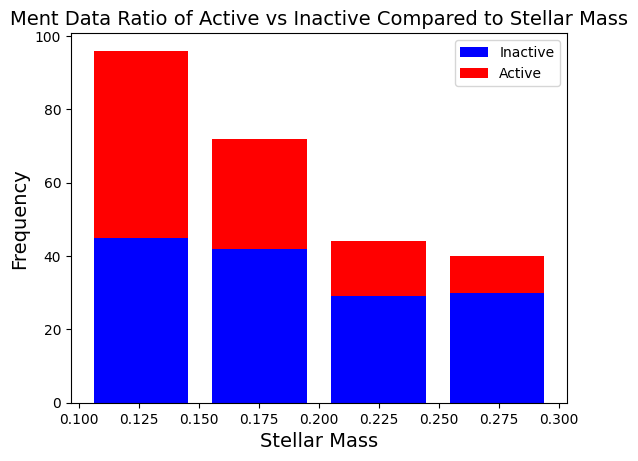

In [17]:
# Plot a histogram of the ratio of active vs inactive compared to stellar mass
plt.hist([data_new[data_new['activity_flag_pred'] == 0]['mass'], data_new[data_new['activity_flag_pred'] == 1]['mass']],
         bins=4, alpha = 1, label=['Inactive', 'Active'], color = ('blue', 'red'), stacked = True, rwidth=0.8)

plt.xlabel('Stellar Mass', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Ment Data Ratio of Active vs Inactive Compared to Stellar Mass', fontsize = 14)
plt.legend()
plt.show()